In [1]:
from qpipe.cost_model import LatCostModel
from qpipe.partitioner import gen_config
global_bz = gen_config.global_bz
micro_bz = gen_config.micro_bz
s = gen_config.s
n = gen_config.n

profiled_result_folder = '/workspace/qpipe/scripts/lat_profiled_result/'
device_names = ['Tesla_V100-SXM2-32GB', 'NVIDIA_A100-SXM4-40GB', 'Tesla_P100-PCIE-12GB']
lat_cost_model = LatCostModel(device_names)
lat_cost_model.update_profiled_result(profiled_result_folder)
lat_cost_model.fit_regression_cost_model()
lat_cost_model.load_regression_cost_model()
lat_cost_model.verbose_regression_names()


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda117.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 117
CUDA SETUP: Loading binary /opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda117.so...


/opt/conda/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib'), PosixPath('/usr/local/nvidia/lib64')}
  warn(msg)
/opt/conda/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/opt/conda/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//matplotlib_inline.backend_inline'), PosixPath('module')}
  warn(msg)
/opt/conda/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: Found duplicate ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] files: {PosixPath('/usr/local/cuda/lib64/libcudart

Tesla_V100-SXM2-32GB_2_14336_57344_1_3.pkl
MSE: 1.7424
Tesla_V100-SXM2-32GB_2_14336_57344_128_3.pkl
MSE: 78.8226
Tesla_V100-SXM2-32GB_2_14336_57344_512_3.pkl
MSE: 409.5522
Tesla_V100-SXM2-32GB_2_14336_57344_1_4.pkl
MSE: 1.5951
Tesla_V100-SXM2-32GB_2_14336_57344_128_4.pkl
MSE: 28.5934
Tesla_V100-SXM2-32GB_2_14336_57344_512_4.pkl
MSE: 556.0804
Tesla_V100-SXM2-32GB_2_14336_57344_1_8:tc-li.pkl
MSE: 1.8176
Tesla_V100-SXM2-32GB_2_14336_57344_128_8:tc-li.pkl
MSE: 23.6152
Tesla_V100-SXM2-32GB_2_14336_57344_512_8:tc-li.pkl
MSE: 35.3110
Tesla_V100-SXM2-32GB_2_14336_57344_1_16.pkl
MSE: 1.7434
Tesla_V100-SXM2-32GB_2_14336_57344_128_16.pkl
MSE: 615.8033
Tesla_V100-SXM2-32GB_2_14336_57344_512_16.pkl
MSE: 1203.4269
Tesla_V100-SXM2-32GB_2_7168_28672_1_3.pkl
MSE: 0.2826
Tesla_V100-SXM2-32GB_2_7168_28672_128_3.pkl
MSE: 0.6462
Tesla_V100-SXM2-32GB_2_7168_28672_512_3.pkl
MSE: 14.8948
Tesla_V100-SXM2-32GB_2_7168_28672_1_4.pkl
MSE: 0.2145
Tesla_V100-SXM2-32GB_2_7168_28672_128_4.pkl
MSE: 0.6801
Tesla_V100-SX

In [2]:
# load groud truth
import pandas as pd
A100_file = 'NVIDIA_A100-SXM4-40GB_30b_test.csv'
P100_file = 'Tesla_P100-PCIE-12GB_30b_test.csv'
V100_file = 'Tesla_V100-SXM2-32GB_30b_test.csv'
groud_t_A100 = pd.read_csv(A100_file)
groud_t_P100 = pd.read_csv(P100_file)
groud_t_V100 = pd.read_csv(V100_file)

In [3]:
# test
predict_lat = lat_cost_model.predict('Tesla_V100-SXM2-32GB', 2, 16, s, 0, 7168, 28672, 4)
groud_lat = lat_cost_model.fetch_lat('Tesla_V100-SXM2-32GB', 2, 16, s, 0, 7168, 28672, 4)
print(predict_lat, groud_lat)

4494.22984182538 4480.748987197876


In [4]:
def get_ground_and_predicts(groud_t, device_name = 'NVIDIA_A100-SXM4-40GB'):
    shard = 2
    predict_points = []
    ground_points = []
    for index, row in groud_t.iterrows():
        batch_size = row['batch_size']
        s = row['input_seq_length']
        past_seq_length = row['past_seq_length']
        h1, h2 = row['h1'], row['h2']
        bit = row['bit']
        lat = row['lat_avg']
        ground_points.append(lat)
        predict_points.append(lat_cost_model.predict(device_name, shard, batch_size, s, past_seq_length, h1, h2, bit))
    return ground_points, predict_points


In [5]:
ground_points_A, predict_points_A = get_ground_and_predicts(groud_t_A100, 'NVIDIA_A100-SXM4-40GB')
ground_points_P, predict_points_P = get_ground_and_predicts(groud_t_P100, 'Tesla_P100-PCIE-12GB')
ground_points_V, predict_points_V = get_ground_and_predicts(groud_t_V100, 'Tesla_V100-SXM2-32GB')

In [9]:
import numpy as np

all_points = ground_points_A + ground_points_P + ground_points_V
all_predicts = predict_points_A + predict_points_P + predict_points_V
error_percent = np.mean(np.abs((np.array(all_points) - np.array(all_predicts)) / np.array(all_points))) * 100


In [11]:
error_percent

5.993362493648544

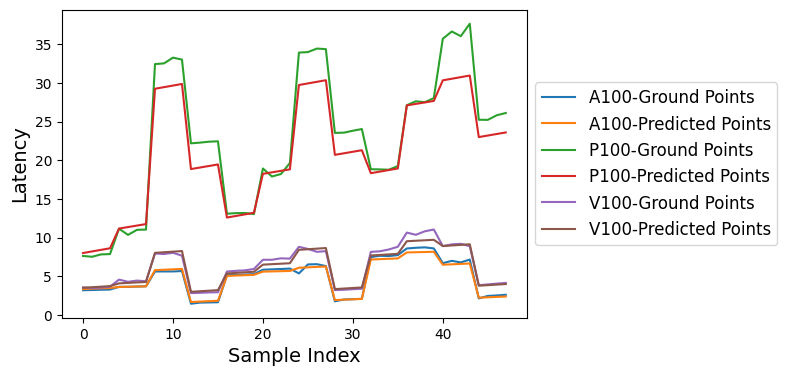

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))  # increase figure size here

ax.plot(ground_points_A, label='A100-Ground Points')
ax.plot(predict_points_A, label='A100-Predicted Points')
ax.plot(ground_points_P, label='P100-Ground Points')
ax.plot(predict_points_P, label='P100-Predicted Points')
ax.plot(ground_points_V, label='V100-Ground Points')
ax.plot(predict_points_V, label='V100-Predicted Points')
ax.set_xlabel('Sample Index', fontsize=14)  # increase x-axis label size here
ax.set_ylabel('Latency', fontsize=14)  # increase y-axis label size here
# ax.set_title('Ground vs Predicted Points for Device {} and Shard {}'.format(device_name, shard), fontsize=16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)  # move legend to the right and increase font size here
plt.savefig('lat_cost_model.png', bbox_inches='tight')  # use bbox_inches to prevent legend from being cut off
plt.show()